In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
import numpy as np
import re as re
import math
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df.head()

Preprocessing

In [4]:
df=pd.read_csv('/content/drive/My Drive/football_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  object 
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  object 
 13  Weak Foot                 18159 non-null  float64
 14  Skill 

In [6]:
def change_currency(l):
  cl=[]
  for x in l:
    if(type(x)==str and x[0]=='€'):
      if(x[-1]=='K'):
        cl.append(float(x[1:-1])*1000)
      elif(x[-1]=='M'):
        cl.append(float(x[1:-1])*1000000)
      else:
        cl.append(float(x[1:]))
    else:
      cl.append(0)
  return cl

df['Value']=change_currency(df['Value'])
df['Wage']=change_currency(df['Wage'])
df['Release Clause'] = change_currency(df['Release Clause'])

In [7]:
df['ID'] = df['ID'].astype(int)
df['Name'] = pd.factorize(df['Name'])[0]
df['Age'] = df['Age'].astype(int)
df['Nationality'] = pd.factorize(df['Nationality'])[0]
df['Overall'] = df['Overall'].astype(int)
df['Potential'] = df['Potential'].astype(int)
df['Club'] = pd.factorize(df['Club'])[0]
df['Special'] = pd.factorize(df['Special'])[0]
df['Preferred Foot'] = pd.factorize(df['Preferred Foot'])[0]

In [8]:
def change_int(l):
  cl=[]
  for x in l:
    if(type(x)!=str):
      cl.append(0)
      continue
    if(type(x)==float):
      print(x)
      cl.append(int(x))
      continue
    s=""
    for c in x:
      if(c>='0' and c<='9'):
        s+=c
    if(s==""):
      cl.append(0)
    else:
      cl.append(int(s))
  return cl

In [9]:
df['International Reputation'] = change_int(df['International Reputation'])
df['Weak Foot'] = change_int(df['Weak Foot'])
df['Skill Moves'] = change_int(df['Skill Moves'])

In [10]:
def fill_vals(l1,l2):
  cl=[]
  for x in l1:
    if x in l2:
      cl.append(l2.index(x)+1)
    else:
      cl.append(0)
  return cl


In [11]:
df['Work Rate'] = fill_vals(df['Work Rate'],['Low/ Low','Low/ Medium','Low/ High','Medium/ Low','Medium/ Medium','Medium/ High','High/ Low','High/ Medium','High/ High'])
df['Body Type'] = fill_vals(df['Body Type'],['Normal','Lean','Stocky'])
df['Real Face'] = fill_vals(df['Real Face'],['Yes','No'])
df['Position'] = pd.factorize(df['Position'])[0]
df['Jersey Number']=change_int(df['Jersey Number'])
df['Loaned From'] = pd.factorize(df['Loaned From'])[0]

In [12]:
def get_year(l):
  cvl=[]
  for a in l:
    if(type(a)==str and len(a)>4 and a[-4:-3]=='2'):
      cvl.append(int(a[-4:]))
    else:
      cvl.append(0)
  return cvl


In [13]:
df['Contract Valid Until']=get_year(df['Contract Valid Until'])
df['Joined'] = get_year(df['Joined'])

In [14]:
h=[]
for x in df['Height']:
  if(type(x)==str and len(x)<=3 and len(x)>=1):
    a=x.split("'")
    h.append(int(a[0])*12+int(a[1]))
  else:
    h.append(5*12)
df['Height']=h

In [15]:
w=[]
for a in df['Weight']:
  if(type(a)==str and len(a)>3 and a[-3:]=="lbs"):
    w.append(int(a[:-3]))
  else:
    w.append(150)
df['Weight']=w

In [16]:
df['Crossing'] = change_int(df['Crossing'])
df['Finishing'] = change_int(df['Finishing'])
df['HeadingAccuracy'] = change_int(df['HeadingAccuracy'])
df['ShortPassing'] = change_int(df['ShortPassing'])
df['Volleys'] = change_int(df['Volleys'])
df['Dribbling'] = change_int(df['Dribbling'])
df['Curve'] = change_int(df['Curve'])
df['FKAccuracy'] = change_int(df['FKAccuracy'])
df['LongPassing'] = change_int(df['LongPassing'])
df['BallControl'] = change_int(df['BallControl'])
df['Acceleration'] = change_int(df['Acceleration'])
df['SprintSpeed'] = change_int(df['SprintSpeed'])
df['Agility'] = change_int(df['Agility'])
df['Reactions'] = change_int(df['Reactions'])
df['Balance'] = change_int(df['Balance'])
df['ShotPower'] = change_int(df['ShotPower'])
df['Jumping'] = change_int(df['Jumping'])
df['Stamina'] = change_int(df['Stamina'])
df['Strength'] = change_int(df['Strength'])
df['LongShots'] = change_int(df['LongShots'])
df['Aggression'] = change_int(df['Aggression'])
df['Interceptions'] = change_int(df['Interceptions'])
df['Positioning'] = change_int(df['Positioning'])
df['Vision'] = change_int(df['Vision'])
df['Penalties'] = change_int(df['Penalties'])
df['Composure'] = change_int(df['Composure'])
df['Marking'] = change_int(df['Marking'])
df['StandingTackle'] = change_int(df['StandingTackle'])
df['SlidingTackle'] = change_int(df['SlidingTackle'])
df['GKDiving'] = change_int(df['GKDiving'])
df['GKHandling'] = change_int(df['GKHandling'])
df['GKKicking'] = change_int(df['GKKicking'])
df['GKPositioning'] = change_int(df['GKPositioning'])
df['GKReflexes'] = change_int(df['GKReflexes'])

In [17]:
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 60
0,0,158023,0,31,0,94,94,0,110500000.0,565000.0,...,0,0,0,0,0,0,0,0,226500000.0,NaN
1,1,20801,1,33,1,94,94,1,77000000.0,405000.0,...,0,0,0,0,0,0,0,0,127100000.0,NaN
2,2,190871,2,26,2,92,93,2,118500000.0,290000.0,...,0,0,0,0,0,0,0,0,228100000.0,NaN
3,3,193080,3,27,3,91,93,3,72000000.0,260000.0,...,0,0,0,0,0,0,0,0,138600000.0,NaN
4,4,192985,4,27,4,91,92,4,102000000.0,355000.0,...,0,0,0,0,0,0,0,0,196400000.0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  int64  
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  int64  
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      18207 non-null  int64  
 8   Value                     18207 non-null  float64
 9   Wage                      18207 non-null  float64
 10  Special                   18207 non-null  int64  
 11  Preferred Foot            18207 non-null  int64  
 12  International Reputation  18207 non-null  int64  
 13  Weak Foot                 18207 non-null  int64  
 14  Skill 

In [256]:
df_scaled = df.copy()
df_scaled.drop(["Unnamed: 60","Unnamed: 0"], axis=1, inplace=True)

In [257]:
# from sklearn import preprocessing

# x = df_scaled.values 
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_scaled = pd.DataFrame(x_scaled)

In [258]:
df_scaled[df_scaled.columns]=StandardScaler().fit_transform(df_scaled)

In [259]:
df_scaled.shape

(18207, 59)

In [260]:
pca_2 = PCA(n_components=2)
pca_2.fit(df_scaled)
pca2_res = pca_2.transform(df_scaled)

In [262]:
pca2_res.shape

(18207, 2)

In [301]:
class KmeansClustering:
  def __init__(self,num_clusters,data):
    self.num_clusters = num_clusters
    self.data = data
    self.num_examples = data.shape[0]
    self.num_features = data.shape[1]
  
  def initialize_random_centroids(self, data):
    centroids = np.zeros((self.num_clusters, self.num_features))
    for i in range(self.num_clusters):
      x=np.random.choice(range(self.num_examples))
      # centroids[i]=data.iloc[[x]]
      centroids[i]=data[x]
    return centroids

  def calculate_new_centroids(self, data,clusters):
    centroids = []
    for i in range(self.num_clusters):
      x=[0 for i in range(self.num_features)]
      d=len(clusters[i])
      for p in clusters[i]:
        for j in range(len(p)):
          x[j]+=p[j]/d
      centroids.append(x)
    return centroids

  def create_cluster(self, data, centroids):
    clusters = [[] for i in range(self.num_clusters)]
    for i in range(len(data)):
      # x=data.loc[[i]].values[0]
      x=data[i]
      dis=0
      minc=0
      mind=999999999999
      for k in range(self.num_clusters):
        for j in range(len(x)):
          dis+= (x[j] - centroids[k][j])**2
        dis = np.sqrt(dis)
        if(dis<mind):
          mind=dis
          minc=k
      clusters[minc].append(x)
    
    return clusters

  def predict_cluster(self, clusters, data):
    clusters_d={}
    for c in range(self.num_clusters):
      for e in clusters[c]:
        clusters_d[str(e)] = c

    y_pred = np.zeros(data.shape[0])
    for i in range(len(data)):
      # x=data.loc[[i]].values[0]
      x=data[i]
      y_pred[i]=int(clusters_d[str(x)])
    return y_pred

  def fit(self, data):
    centroids = self.initialize_random_centroids(data)
    for i in range(100):
      clusters = self.create_cluster(data,centroids)
      prev_centroids = centroids
      new_centroids = self.calculate_new_centroids(data,clusters)
      # if(i%10==0): print(len(clusters[0]),len(clusters[1]),len(clusters[2]))
      f=0
      for j in range(self.num_clusters):
        for k in range(self.num_features):
          if(abs(new_centroids[j][k] - prev_centroids[j][k])>0.001):
            f=1
            break
        if(f==1): break
      if(f==0): break
      centroids = new_centroids
    y_pred = self.predict_cluster(clusters, data)
    return centroids,y_pred

In [288]:
kmeans = KmeansClustering(3,pca2_res)
centroids,y_pred=kmeans.fit(pca2_res)

9569 4727 3911
11813 3511 2883
14421 1298 2488
15050 1247 1910
15219 1251 1737
15257 1251 1699
15274 1251 1682


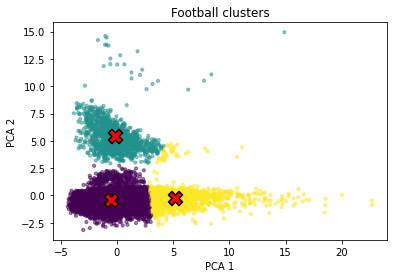

In [289]:
x = pca2_res[:, 0]
y = pca2_res[:, 1]

plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)  # plot different colors per cluster
plt.title('Football clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

cpx = [a[0] for a in centroids]
cpy = [a[1] for a in centroids]
plt.scatter(cpx, cpy, marker='X', s=200, linewidths=1.5,
            color='red', edgecolors="black", lw=1.5)

plt.show()

10915 2848 3174
2291 4139 10566
1431 3573 11978
1236 3439 12303
1137 3372 12468
1035 3304 12637


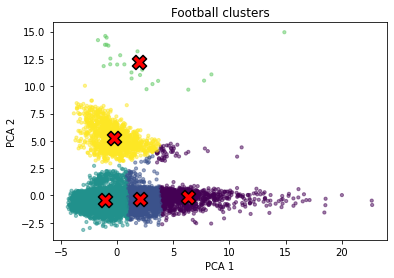

In [293]:
#k=5
kmeans = KmeansClustering(5,pca2_res)
centroids,y_pred=kmeans.fit(pca2_res)
x = pca2_res[:, 0]
y = pca2_res[:, 1]

plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)  # plot different colors per cluster
plt.title('Football clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

cpx = [a[0] for a in centroids]
cpy = [a[1] for a in centroids]
plt.scatter(cpx, cpy, marker='X', s=200, linewidths=1.5,
            color='red', edgecolors="black", lw=1.5)

plt.show()

8947 1713 1871
10033 6004 881
9792 6153 845


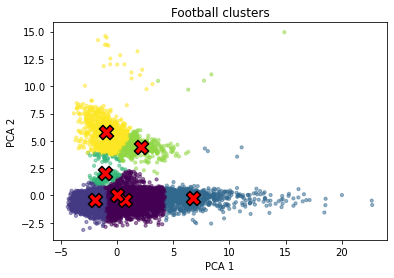

In [294]:
#k=7
kmeans = KmeansClustering(7,pca2_res)
centroids,y_pred=kmeans.fit(pca2_res)
x = pca2_res[:, 0]
y = pca2_res[:, 1]

plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)  # plot different colors per cluster
plt.title('Football clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

cpx = [a[0] for a in centroids]
cpy = [a[1] for a in centroids]
plt.scatter(cpx, cpy, marker='X', s=200, linewidths=1.5,
            color='red', edgecolors="black", lw=1.5)

plt.show()

elbow method


In [296]:
pca2_res[0][0]

22.70811693489093

In [325]:
from scipy.spatial.distance import cdist
costs =[]
for i in range(1,10):
  kmeans = KmeansClustering(i,pca2_res)
  centroids,y_pred=kmeans.fit(pca2_res)
  dis= sum(np.min(cdist(pca2_res, centroids, 'euclidean'), axis=1)) / len(2*pca2_res)
  costs.append(dis)

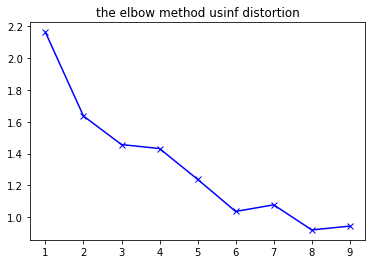

In [327]:
x=[i for i in range(1,10)]
plt.plot(x,costs,'bx-')
plt.title("the elbow method usinf distortion")
plt.show()

we have to select the value of k , after which inertia started decreasing in linear fashion.
For the given data, we can see that it started at 3.

In [330]:
from sklearn import metrics
x=[]
scores=[]
for i in range(3,20,2):
  x.append(i)
  kmeans = KmeansClustering(i,pca2_res)
  centroids,y_pred=kmeans.fit(pca2_res)
  ss = metrics.silhouette_score(pca2_res, y_pred)
  scores.append(ss)

<BarContainer object of 9 artists>

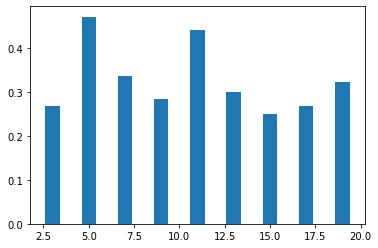

In [331]:
plt.bar(x,scores)

it is giving better values for k=3